In [65]:
import matplotlib.pyplot as plt
plt.rcParams["pdf.fonttype"]=42
plt.rcParams["font.size"]=14
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["axes.spines.right"]=False
plt.rcParams["axes.spines.top"]=False
plt.rcParams["axes.grid"] = True
import seaborn as sns
import numpy as np
import pandas as pd

from scipy.stats import norm
def auc_from_maha(maha_dist: float):
    # source: https://en.wikipedia.org/wiki/Sensitivity_index#RMS_sd_discriminability_index
    auc = norm.cdf(maha_dist / np.sqrt(2))
    return auc

In [27]:
maha_post = pd.read_pickle("simulate_maha_post.pkl")
maha_pre = pd.read_pickle("simulate_maha_pre.pkl")
maha_post

,param,score,perm_scores,pval
0,0.0,0.525877,"[0.5536127022409808, 0.4253843834790473, 0.504...",0.262369
1,0.0,0.486917,"[0.5401503759398496, 0.5001503759398497, 0.552...",0.640180
2,0.0,0.490149,"[0.44724472447244723, 0.5536553655365537, 0.50...",0.590705
3,0.0,0.594286,"[0.4622556390977444, 0.5138847117794486, 0.588...",0.008996
4,0.0,0.514851,"[0.45484548454845486, 0.4964496449644964, 0.45...",0.349325
...,...,...,...,...
495,1.5,0.806025,"[0.5689120208187368, 0.4692223000700631, 0.439...",0.000500
496,1.5,0.864278,"[0.5523971574416975, 0.5135622059853868, 0.545...",0.000500
497,1.5,0.878100,"[0.4227, 0.4411, 0.4757, 0.43050000000000005, ...",0.000500
498,1.5,0.851967,"[0.49638699317543156, 0.48454435969490167, 0.4...",0.000500


In [28]:
maha_post

,param,score,perm_scores,pval
0,0.0,0.525877,"[0.5536127022409808, 0.4253843834790473, 0.504...",0.262369
1,0.0,0.486917,"[0.5401503759398496, 0.5001503759398497, 0.552...",0.640180
2,0.0,0.490149,"[0.44724472447244723, 0.5536553655365537, 0.50...",0.590705
3,0.0,0.594286,"[0.4622556390977444, 0.5138847117794486, 0.588...",0.008996
4,0.0,0.514851,"[0.45484548454845486, 0.4964496449644964, 0.45...",0.349325
...,...,...,...,...
495,1.5,0.806025,"[0.5689120208187368, 0.4692223000700631, 0.439...",0.000500
496,1.5,0.864278,"[0.5523971574416975, 0.5135622059853868, 0.545...",0.000500
497,1.5,0.878100,"[0.4227, 0.4411, 0.4757, 0.43050000000000005, ...",0.000500
498,1.5,0.851967,"[0.49638699317543156, 0.48454435969490167, 0.4...",0.000500


In [29]:
maha_post.groupby("param").agg({"pval":("mean", "std"), "score":("mean", "std")})

pval               score          
           mean       std      mean       std
param                                        
0.000  0.465097  0.313642  0.505552  0.046856
0.375  0.085717  0.168095  0.589216  0.048689
0.750  0.001089  0.003475  0.686926  0.040617
1.125  0.000500  0.000000  0.782997  0.030110
1.500  0.000500  0.000000  0.840548  0.026692

In [30]:
maha_pre.groupby("param").agg({"pval":("mean", "std"), "score":("mean", "std")})

pval               score          
           mean       std      mean       std
param                                        
0.000  0.466633  0.277919  0.504976  0.038759
0.375  0.488358  0.007462  1.000000  0.000000
0.750  0.484547  0.007712  1.000000  0.000000
1.125  0.481574  0.007913  1.000000  0.000000
1.500  0.475625  0.007601  1.000000  0.000000

In [31]:
null_scores = maha_post.explode("perm_scores").groupby("param").agg({"perm_scores":("mean", "std")})

(array([16., 18., 14., 20., 12., 18., 13., 14., 11., 14.]),
 array([0.00359928, 0.10085983, 0.19812038, 0.29538092, 0.39264147,
        0.48990202, 0.58716257, 0.68442312, 0.78168366, 0.87894421,
        0.97620476]),
 <BarContainer object of 10 artists>)

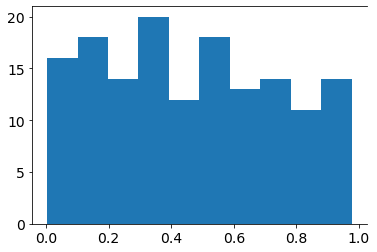

In [62]:
plt.hist(maha_pre[maha_pre.param==0.]['pval'])

In [33]:
(maha_pre[maha_pre.param==0.]['pval'] < .05).mean()

0.04

## Are we over-fitting or under-fitting?

In [47]:
maha_pre['expected_auc']= maha_pre['param'].apply(auc_from_maha)
maha_pre['type'] = "pre"
maha_post['expected_auc']= maha_post['param'].apply(auc_from_maha)
maha_post['type'] = "post"

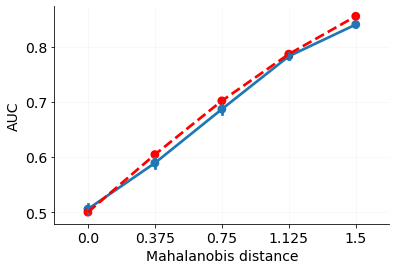

In [66]:
ax = sns.pointplot(data=maha_post, x="param", y="score", label="Actual AUC")
sns.pointplot(data=maha_post, x="param", y="expected_auc", ax =ax, color='red', linestyles='--', label = "Expected AUC")
ax.set_xlabel("Mahalanobis distance")
ax.set_ylabel("AUC")
plt.grid(True, alpha=0.1)
# plt.legend()
# sns.pointplot(data=null_scores, x="param", y="mean")

In [67]:
maha = pd.concat([maha_post, maha_pre])

(0.368359375, 1.0)

<Figure size 432x720 with 0 Axes>

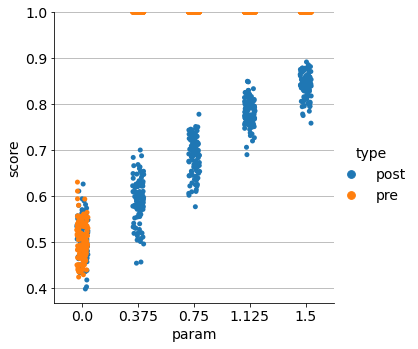

In [68]:
plt.figure(figsize=(6, 10))
sns.catplot(data=maha, x='param', y='score', hue="type", kind='strip')
plt.ylim(None, 1)

(0.0, 1.0)

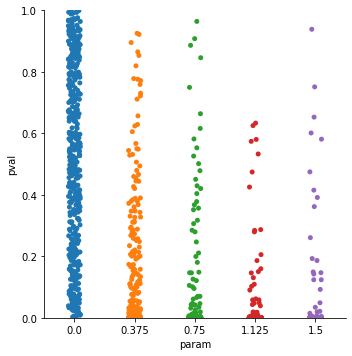

In [35]:
sns.catplot(data=maha_post, x='param', y='pval', kind='strip')
plt.ylim(0, 1)

<AxesSubplot:xlabel='param', ylabel='expected_auc'>

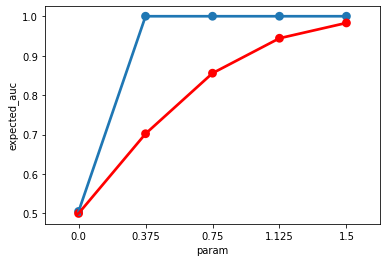

In [36]:
ax = sns.pointplot(data=maha_pre, x="param", y="score",)
sns.pointplot(data=maha_pre, x="param", y="expected_auc", ax=ax, color='red')

In [12]:
samplesize = pd.read_pickle("simulate_samplesize_pre.pkl")

Text(0.5, 0, 'N samples')

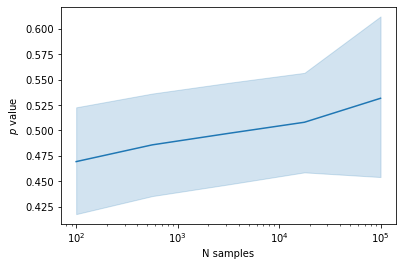

In [13]:
ax = sns.lineplot(data=samplesize, x="param", y="pval")
plt.xscale("log")
plt.ylabel(r"$p$ value")
plt.xlabel(r"N samples")

In [24]:
import time

In [25]:
time.strftime("%m%d%y_%H:%M")

'032023_14:25'